# Random Forest
Дерево решений - это модель, которая более других склонна к переобучению.

**Идея**: дерево решений с маленькой глубиной выделяет *частную закономерность* имеющихся данных. Значит, в стремлении к выделению общей закономерности можно использовать несколько разных деревьев, каждое из которых будет обучаться на своей уникальной *подвыборке*, которая содержит уникальный набор признаков -> **случайный лес**.
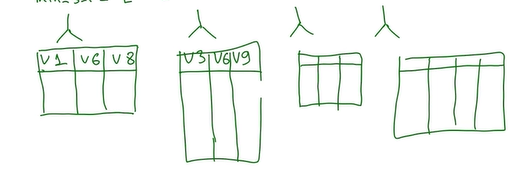
Каждое из деревьев будет обучено на своем наборе данных. После этого для любого нового объекта мы выдаем несколько предсказаний (от каждого дерева свой вектор вероятностей принадлежности к тому или иному классу). Все векторы будут складываться и усредняться. Далее выбирается класс с наибольшей вероятностью.

$(v_1+v_2+...+v_n)/n$, где $v_i = (p_{i1}, ..., p_{ic}), p_{..j} $- предсказанная вероятность принадлежности к j-му классу


**Процесс обучения:** 
Каждое дерево случайным образом выбирает подвыборку наших данных (можно использовать custom selection method), затем обучается на нем. Все деревья имеют *одинаковые* параметры (глубина, число листьев и т.д.)

**Свойства:**
- Обычно чем больше деревьев, тем лучше (но надо постараться найти минимальное число деревьев, на котором достигается достаточно хороший результат)
- В отличие от DecisionTree результаты этой модели трудно интерпретировать
- Признаки в подвыборках не должны коррелировать между собой (иначе теряется концепция обучения)

**Почему это работает?**  
В 1906 г. в городе Плимут (Великобритания) на сельской ярмарке был проведен эксперимент. Френсис Гальтон в качестве развлечения посетителей ярмарки предложил на глаз оценить вес выставленного на всеобщее обозрение быка и написать эту цифру на специальном билете. За правильные ответы организаторы шоу обещали призы. В результате в голосовании приняли участие около 800 человек — как заядлых фермеров, так и людей, далеких от скотоводческих дел. Собрав после этой ярмарки все билеты для анализа, Гальтон высчитал среднее арифметическое значение для всей выборки — 1197 фунтов. Реальный же вес быка оказался 1198 фунтов (543,4 кг). Каким-то непостижимым образом разношерстная публика дала ответ, максимально приближенный к реальному показателю. Т.е. ответ публики был точнее чем ответ отдельно взятого эксперта, например мясника или скотовода. Гальтон, который до этого свято верил в селекцию и превосходство одних людей над другими, был вынужден сменить вектор своих исследований.

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [26]:
iris = pd.read_csv('data/iris.csv', index_col=0)
iris.sample(3)

,sepal length,sepal width,petal length,petal width,species
103,6.3,2.9,5.6,1.8,2
115,6.4,3.2,5.3,2.3,2
142,5.8,2.7,5.1,1.9,2


In [30]:
# data preparing
features = list(titanic.columns)
features.remove('species')
features = iris[features]

target = iris.species

X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=19)
X_train.shape

(112, 4)

In [32]:
rf_model = RandomForestClassifier(n_estimators=15)
parameters = {'max_depth':[3, 5, 7],
              'min_samples_leaf': range(3, 13, 2)}
grid = GridSearchCV(estimator=rf_model,
                    param_grid=parameters)
grid.fit(X_train, y_train)
print('best parameters is {}'.format(grid.best_params_))
grid.score(X_test, y_test)

best parameters is {'max_depth': 5, 'min_samples_leaf': 9}


0.9473684210526315

# Важность признаков
RandomForest (как и DecisionTree) дает возможность посмотреть на **значимость** признаков при получении предсказания: какие признаки объектов учитываются в большей мере (какие features снижают неопределенность более всего?)

In [36]:
best_model = grid.best_estimator_
importance_df = pd.DataFrame({'features': list(X_train),
                          'importances': best_model.feature_importances_})
importance_df.sort_values('importances', ascending=False)

,features,importances
3,petal width,0.474264
2,petal length,0.434597
0,sepal length,0.089781
1,sepal width,0.001359


Важность признаков может помочь оценить *причинно-следственные связи*, но есть особенность: дерево решений/случайный лес выбирают из двух признаков с близким Information gain только один признак. Иначе говоря, важность признаков может быть одинакова (признаки коррелируют между собой), но выбор дерева будет только за одним признаком и, соответственно, в feature_importances_ попадет только один. Поэтому важно проводить EDA.

## Бонус: важность EDA
Почему важна предобработка данных?

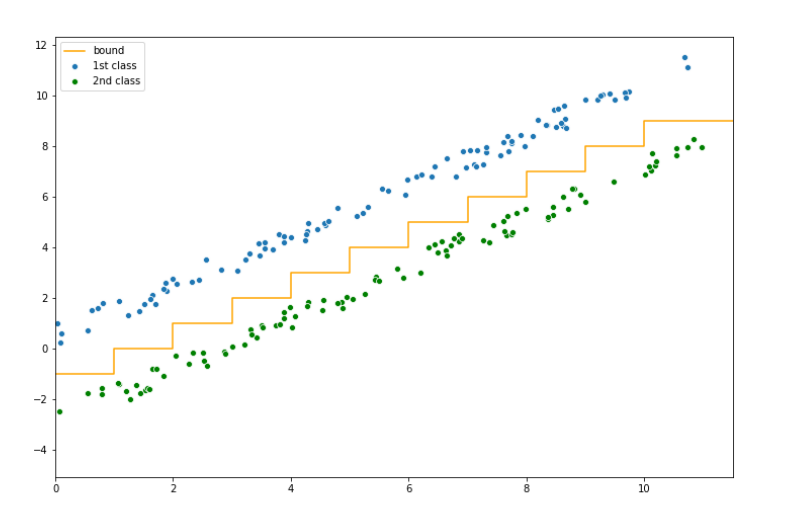  
При исходных данных: дереву решений потребуется большая глубина, чтобы построить границу (bound) в виде ломаной. Однако если на этапе EDA было выявлено распределение классов, то можно сделать преобразование признаков, которое "повернет" наши данные. Тогда границей будет прямая линия, то есть глубина дерева будет равна 1
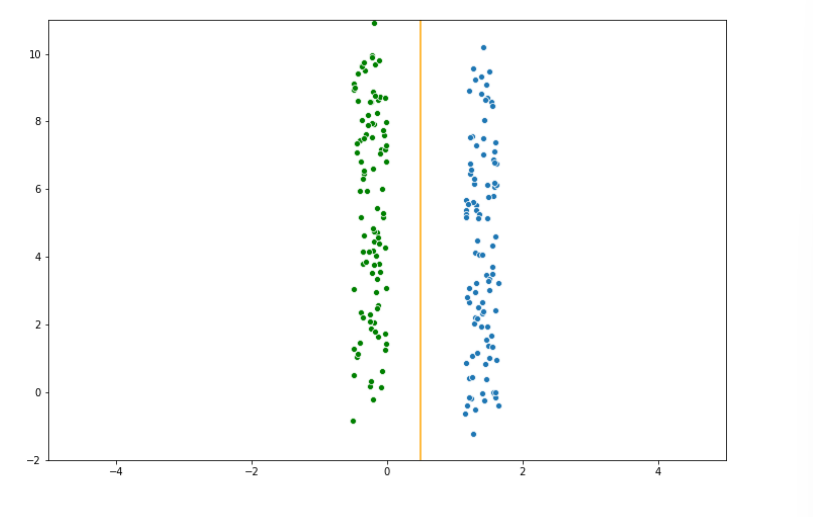

# Задание

In [59]:
import numpy as np

np.random.seed(0)

In [47]:
data = pd.read_csv('data/heart_cleveland_upload.csv')
print('data has {} rows and {} columns'.format(len(data), len(data.columns)))
data.head()

data has 297 rows and 14 columns


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [56]:
features = data[[col for col in data.columns if col != 'condition']]
target = data['condition']

features.head(1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0


In [58]:
X_train, X_test, y_train, y_test = train_test_split(features, target)
X_train.shape

(222, 13)

<AxesSubplot:xlabel='feature_name'>

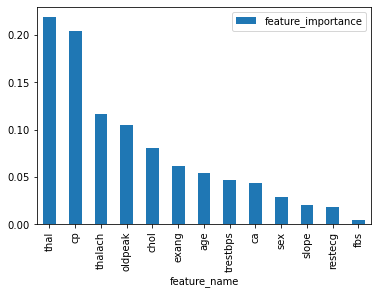

In [69]:
rf = RandomForestClassifier(n_estimators=10, 
                            max_depth=5).fit(X_train, y_train)
importance_df = pd.DataFrame({'feature_name': list(X_train),
                              'feature_importance': rf.feature_importances_})
importance_df.sort_values('feature_importance', ascending=False) \
            .plot.bar(x='feature_name')

Случайный лес хорошо справляется с задачами классификации/регрессии, но она слишком зависит от данных. Например, чтобы классифицировать такой набор данных:
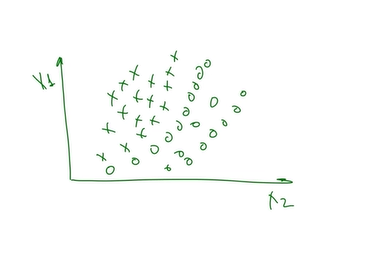  
необходимо провести ломаную линию (то есть потребуется много разбиений нашего дерева/деревьев). Хотя намного лучше сделать *нелинейное* разбиение, на которое не способны деревья. Зато на это способны другие модели (например, *нейронные сети*). 

В то же время деревья решений работают намного хуже, когда признаков очень много и все они в некотором смысле важны (например, пиксели изображений)